In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df1 = pd.read_csv('Quantity.csv', sep=';' )
df2 = pd.read_csv('ProductName.csv', sep=';')

In [3]:
df1.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,UnitPrice,DueDate
0,528,14870,SO51900,1,"4,99",09.02.2013
1,528,15319,SO51948,1,"4,99",10.02.2013
2,528,16384,SO52043,1,"4,99",12.02.2013
3,528,15476,SO52045,1,"4,99",12.02.2013
4,528,15861,SO52094,1,"4,99",13.02.2013


In [4]:
df1['UnitPrice'] = df1['UnitPrice'].str.replace(',', '.')
df1.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,UnitPrice,DueDate
0,528,14870,SO51900,1,4.99,09.02.2013
1,528,15319,SO51948,1,4.99,10.02.2013
2,528,16384,SO52043,1,4.99,12.02.2013
3,528,15476,SO52045,1,4.99,12.02.2013
4,528,15861,SO52094,1,4.99,13.02.2013


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 6 columns):
ProductKey          60398 non-null int64
CustomerKey         60398 non-null int64
SalesOrderNumber    60398 non-null object
OrderQuantity       60398 non-null int64
UnitPrice           60398 non-null object
DueDate             60398 non-null object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


In [6]:
df2.head()

,ProductKey,EnglishProductName
0,1,Adjustable Race
1,2,Bearing Ball
2,12,Crown Race
3,14,Decal 1
4,15,Decal 2


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 2 columns):
ProductKey            606 non-null int64
EnglishProductName    606 non-null object
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [8]:
df2['EnglishProductName'].value_counts()

HL Mountain Frame - Black, 46     3
LL Road Frame - Black, 60         3
LL Road Frame - Black, 44         3
LL Road Frame - Black, 52         3
HL Mountain Frame - Black, 42     3
HL Road Frame - Red, 44           3
Sport-100 Helmet, Black           3
Long-Sleeve Logo Jersey, XL       3
Long-Sleeve Logo Jersey, S        3
HL Mountain Frame - Silver, 38    3
HL Road Frame - Red, 52           3
HL Mountain Frame - Silver, 42    3
Sport-100 Helmet, Blue            3
LL Road Frame - Black, 58         3
HL Mountain Frame - Silver, 46    3
Sport-100 Helmet, Red             3
HL Mountain Frame - Black, 38     3
Long-Sleeve Logo Jersey, L        3
LL Road Frame - Black, 48         3
AWC Logo Cap                      3
Long-Sleeve Logo Jersey, M        3
HL Road Frame - Red, 62           3
LL Road Frame - Black, 62         3
HL Road Frame - Red, 48           3
HL Road Frame - Red, 56           3
LL Road Handlebars                2
HL Road Frame - Black, 62         2
LL Road Frame - Red, 44     

In [9]:
data = pd.merge(df1, df2, on="ProductKey")
data['EnglishProductName'].value_counts()

Water Bottle - 30 oz.         4244
Patch Kit/8 Patches           3191
Mountain Tire Tube            3095
Road Tire Tube                2376
Sport-100 Helmet, Red         2230
AWC Logo Cap                  2190
Sport-100 Helmet, Blue        2125
Fender Set - Mountain         2121
Sport-100 Helmet, Black       2085
Mountain Bottle Cage          2025
Road Bottle Cage              1712
Touring Tire Tube             1488
HL Mountain Tire              1396
ML Mountain Tire              1161
LL Road Tire                  1044
Touring Tire                   935
ML Road Tire                   926
Bike Wash - Dissolver          908
LL Mountain Tire               862
HL Road Tire                   858
Hydration Pack - 70 oz.        733
Mountain-200 Black, 46         620
Mountain-200 Black, 42         614
Mountain-200 Silver, 38        596
Mountain-200 Black, 38         582
Mountain-200 Silver, 46        580
Mountain-200 Silver, 42        560
Half-Finger Gloves, M          499
Half-Finger Gloves, 

In [10]:
data.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,UnitPrice,DueDate,EnglishProductName
0,528,14870,SO51900,1,4.99,09.02.2013,Mountain Tire Tube
1,528,15319,SO51948,1,4.99,10.02.2013,Mountain Tire Tube
2,528,16384,SO52043,1,4.99,12.02.2013,Mountain Tire Tube
3,528,15476,SO52045,1,4.99,12.02.2013,Mountain Tire Tube
4,528,15861,SO52094,1,4.99,13.02.2013,Mountain Tire Tube


In [11]:
data['EnglishProductName'] = data['EnglishProductName'].str.strip()
data['CustomerKey'] = data['CustomerKey'].astype('str')
data.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,UnitPrice,DueDate,EnglishProductName
0,528,14870,SO51900,1,4.99,09.02.2013,Mountain Tire Tube
1,528,15319,SO51948,1,4.99,10.02.2013,Mountain Tire Tube
2,528,16384,SO52043,1,4.99,12.02.2013,Mountain Tire Tube
3,528,15476,SO52045,1,4.99,12.02.2013,Mountain Tire Tube
4,528,15861,SO52094,1,4.99,13.02.2013,Mountain Tire Tube


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 0 to 60397
Data columns (total 7 columns):
ProductKey            60398 non-null int64
CustomerKey           60398 non-null object
SalesOrderNumber      60398 non-null object
OrderQuantity         60398 non-null int64
UnitPrice             60398 non-null object
DueDate               60398 non-null object
EnglishProductName    60398 non-null object
dtypes: int64(2), object(5)
memory usage: 3.7+ MB


In [13]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

mybasket = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.head()

EnglishProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11001,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11004,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)
my_frequent_itemsets.head(100)

,support,itemsets
0,0.115343,(AWC Logo Cap)
1,0.114153,(Fender Set - Mountain)
2,0.075525,(HL Mountain Tire)
3,0.108418,(Mountain Bottle Cage)
4,0.160138,(Mountain Tire Tube)
5,0.159597,(Patch Kit/8 Patches)
6,0.091971,(Road Bottle Cage)
7,0.120428,(Road Tire Tube)
8,0.109500,"(Sport-100 Helmet, Black)"
9,0.110907,"(Sport-100 Helmet, Blue)"


In [15]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)
my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.108418,0.220353,0.092188,0.850299,3.858810,0.068298,5.208044
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.220353,0.108418,0.092188,0.418365,3.858810,0.068298,1.532889
2,(Road Bottle Cage),(Water Bottle - 30 oz.),0.091971,0.220353,0.082341,0.895294,4.063004,0.062075,7.446069
3,(Water Bottle - 30 oz.),(Road Bottle Cage),0.220353,0.091971,0.082341,0.373680,4.063004,0.062075,1.449785


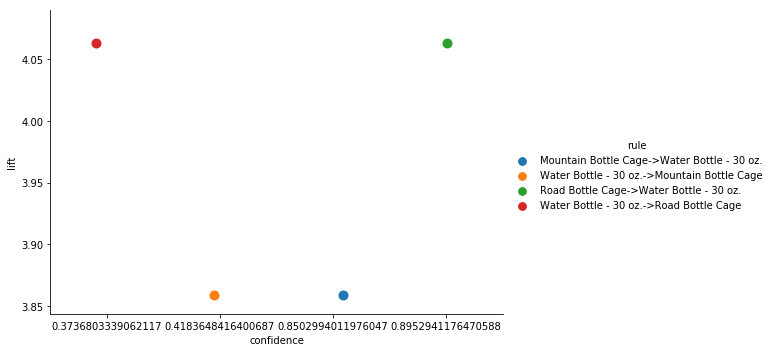

In [16]:
 my_rules["rule"] = my_rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

sns.catplot(data=my_rules, x = "confidence", y = "lift", aspect = 1.5, hue = "rule", s = 10)
plt.show()

In [17]:
data.to_csv(r'C:\Users\User\Desktop\Praca\Infosys\data.csv', index = False, header=True)

In [18]:
data['EnglishProductName'].unique()

array(['Mountain Tire Tube', 'Water Bottle - 30 oz.', 'Touring Tire Tube',
       'Road-150 Red, 44', 'Road-150 Red, 56', 'Road-150 Red, 52',
       'Road-150 Red, 62', 'Road-150 Red, 48', 'Road-750 Black, 44',
       'Road-750 Black, 48', 'Road-750 Black, 52', 'Road-750 Black, 58',
       'Mountain-500 Black, 44', 'Mountain-500 Black, 48',
       'Mountain-500 Black, 40', 'Mountain-500 Black, 52',
       'Mountain-500 Black, 42', 'Touring-1000 Blue, 46',
       'Touring-1000 Blue, 54', 'Touring-1000 Blue, 60',
       'Touring-1000 Blue, 50', 'Touring-1000 Yellow, 50',
       'Touring-1000 Yellow, 46', 'Touring-1000 Yellow, 54',
       'Touring-1000 Yellow, 60', 'Mountain-200 Black, 46',
       'Mountain-200 Black, 38', 'Mountain-200 Black, 42',
       'Mountain-200 Silver, 42', 'Mountain-200 Silver, 38',
       'Mountain-200 Silver, 46', "Women's Mountain Shorts, L",
       "Women's Mountain Shorts, S", "Women's Mountain Shorts, M",
       'Road-550-W Yellow, 44', 'Road-550-W Yellow, 

In [19]:
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-150' if x.split()[0] == 'Road-150' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-250' if x.split()[0] == 'Road-250' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-350-W' if x.split()[0] == 'Road-350-W' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-550-W' if x.split()[0] == 'Road-550-W' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-650' if x.split()[0] == 'Road-650' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-750' if x.split()[0] == 'Road-750' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Mountain-100' if x.split()[0] == 'Mountain-100' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Mountain-200' if x.split()[0] == 'Mountain-200' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Mountain-400-W' if x.split()[0] == 'Mountain-400-W' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Mountain-500' if x.split()[0] == 'Mountain-500' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Touring-1000' if x.split()[0] == 'Touring-1000' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Touring-2000' if x.split()[0] == 'Touring-2000' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Touring-3000' if x.split()[0] == 'Touring-3000' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Classic Jersey' if x.split()[0] == 'Short-Sleeve' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Logo Jersey' if x.split()[0] == 'Long-Sleeve' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Sport-100 Helmet' if x.split()[0] == 'Sport-100' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Classic Vest' if x.split()[0] == 'Classic' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Half-Finger Gloves' if x.split()[0] == 'Half-Finger' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Racing Socks' if x.split()[0] == 'Racing' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: "Women's Mountain Shorts" if x.split()[0] == "Women's" else x)

In [20]:
data['EnglishProductName'].unique()
#Classic Jersey stands for Breathable moisture controll classic jersey
#Logo Jersey stands for Unisex AWC logo microfiber cycling jersey
#HL stands for lighweight reinforced carbon material - highest shelf
#ML stands for high-density rubber - middle shelf
#LL stands budget material - lowest shelf

array(['Mountain Tire Tube', 'Water Bottle - 30 oz.', 'Touring Tire Tube',
       'Road-150', 'Road-750', 'Mountain-500', 'Touring-1000',
       'Mountain-200', "Women's Mountain Shorts", 'Road-550-W',
       'Road-350-W', 'ML Road Tire', 'LL Mountain Tire', 'Road-650',
       'Mountain-400-W', 'Touring-3000', 'Road-250', 'Touring-2000',
       'Mountain-100', 'Classic Vest', 'Hitch Rack - 4-Bike',
       'Bike Wash - Dissolver', 'Sport-100 Helmet', 'Patch Kit/8 Patches',
       'LL Road Tire', 'Half-Finger Gloves', 'Logo Jersey',
       'Racing Socks', 'Road Bottle Cage', 'AWC Logo Cap', 'Touring Tire',
       'HL Road Tire', 'ML Mountain Tire', 'HL Mountain Tire',
       'Mountain Bottle Cage', 'Road Tire Tube', 'Fender Set - Mountain',
       'Hydration Pack - 70 oz.', 'All-Purpose Bike Stand'], dtype=object)

In [21]:
data.to_csv(r'C:\Users\User\Desktop\Praca\Infosys\data2.csv', index = False, header=True)

In [22]:
mybasket2 = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_sets2 = mybasket2.applymap(my_encode_units)
my_basket_sets2.head()

EnglishProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,Classic Vest,Fender Set - Mountain,HL Mountain Tire,HL Road Tire,Half-Finger Gloves,Hitch Rack - 4-Bike,Hydration Pack - 70 oz.,...,Road-650,Road-750,Sport-100 Helmet,Touring Tire,Touring Tire Tube,Touring-1000,Touring-2000,Touring-3000,Water Bottle - 30 oz.,Women's Mountain Shorts
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
11001,1,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
11002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
11003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1,0
11004,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
my_frequent_itemsets2 = apriori(my_basket_sets2, min_support=0.07, use_colnames=True)
my_frequent_itemsets2.head(23)

,support,itemsets
0,0.115343,(AWC Logo Cap)
1,0.113395,(Classic Vest)
2,0.114153,(Fender Set - Mountain)
3,0.075525,(HL Mountain Tire)
4,0.074443,(Half-Finger Gloves)
5,0.091106,(Logo Jersey)
6,0.108418,(Mountain Bottle Cage)
7,0.160138,(Mountain Tire Tube)
8,0.162898,(Mountain-200)
9,0.159597,(Patch Kit/8 Patches)


In [24]:
my_rules2 = association_rules(my_frequent_itemsets2, metric="lift", min_threshold=1)
my_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.108418,0.220353,0.092188,0.850299,3.858810,0.068298,5.208044
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.220353,0.108418,0.092188,0.418365,3.858810,0.068298,1.532889
2,(Sport-100 Helmet),(Mountain Tire Tube),0.322441,0.160138,0.078392,0.243121,1.518191,0.026757,1.109637
3,(Mountain Tire Tube),(Sport-100 Helmet),0.160138,0.322441,0.078392,0.489527,1.518191,0.026757,1.327316
4,(Road Bottle Cage),(Water Bottle - 30 oz.),0.091971,0.220353,0.082341,0.895294,4.063004,0.062075,7.446069


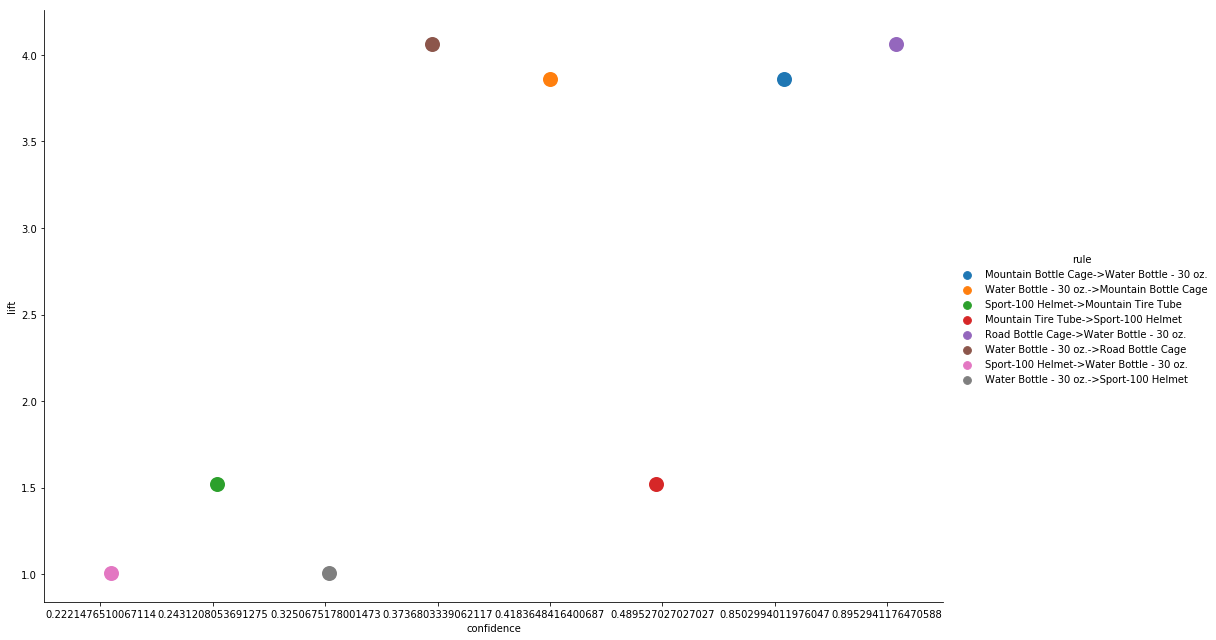

In [25]:
 my_rules2["rule"] = my_rules2["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rules2["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

sns.catplot(data=my_rules2, x = "confidence", y = "lift", aspect = 1.5, hue = "rule", height=9, s = 15)
plt.show()

In [26]:
data['EnglishProductName'].value_counts()

Sport-100 Helmet           6440
Water Bottle - 30 oz.      4244
Mountain-200               3552
Patch Kit/8 Patches        3191
Mountain Tire Tube         3095
Road Tire Tube             2376
AWC Logo Cap               2190
Classic Vest               2158
Fender Set - Mountain      2121
Mountain Bottle Cage       2025
Road-250                   1903
Logo Jersey                1736
Road Bottle Cage           1712
Road-150                   1551
Touring Tire Tube          1488
Road-750                   1443
Half-Finger Gloves         1430
HL Mountain Tire           1396
Road-550-W                 1390
Touring-1000               1255
ML Mountain Tire           1161
LL Road Tire               1044
Women's Mountain Shorts    1019
Touring Tire                935
Road-350-W                  929
ML Road Tire                926
Bike Wash - Dissolver       908
LL Mountain Tire            862
HL Road Tire                858
Road-650                    852
Hydration Pack - 70 oz.     733
Racing S

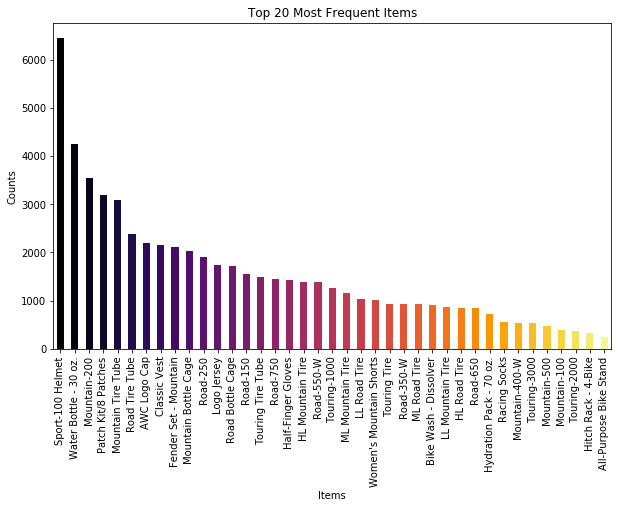

In [27]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,40))
data['EnglishProductName'].value_counts().head(40).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

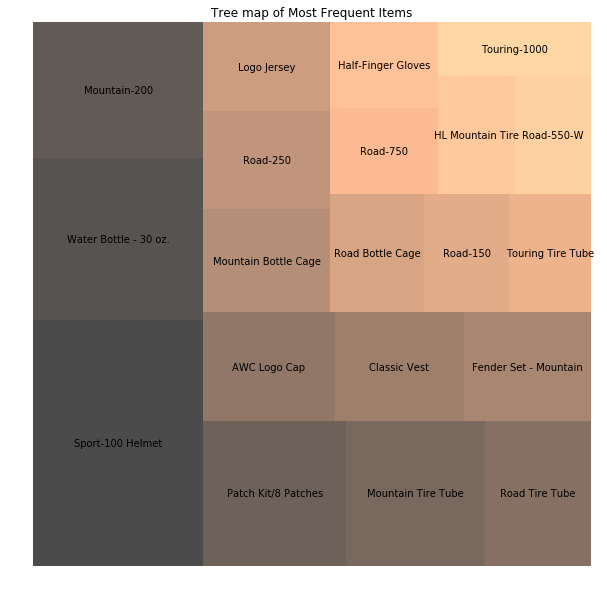

In [28]:
plt.rcParams['figure.figsize']=(10,10)
Items = data['EnglishProductName'].value_counts().head(20).to_frame()
size = Items['EnglishProductName'].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [29]:
data['EnglishProductName'].unique()

array(['Mountain Tire Tube', 'Water Bottle - 30 oz.', 'Touring Tire Tube',
       'Road-150', 'Road-750', 'Mountain-500', 'Touring-1000',
       'Mountain-200', "Women's Mountain Shorts", 'Road-550-W',
       'Road-350-W', 'ML Road Tire', 'LL Mountain Tire', 'Road-650',
       'Mountain-400-W', 'Touring-3000', 'Road-250', 'Touring-2000',
       'Mountain-100', 'Classic Vest', 'Hitch Rack - 4-Bike',
       'Bike Wash - Dissolver', 'Sport-100 Helmet', 'Patch Kit/8 Patches',
       'LL Road Tire', 'Half-Finger Gloves', 'Logo Jersey',
       'Racing Socks', 'Road Bottle Cage', 'AWC Logo Cap', 'Touring Tire',
       'HL Road Tire', 'ML Mountain Tire', 'HL Mountain Tire',
       'Mountain Bottle Cage', 'Road Tire Tube', 'Fender Set - Mountain',
       'Hydration Pack - 70 oz.', 'All-Purpose Bike Stand'], dtype=object)

In [30]:
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Road-bike' if x.split('-')[0] == 'Road' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Mountain-bike' if x.split('-')[0] == 'Mountain' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Touring-bike' if x.split('-')[0] == 'Touring' else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Tire/Tube' if 'Tire' in x.split() else x)
data['EnglishProductName'] = data['EnglishProductName'].apply(lambda x: 'Jersey' if 'Jersey' in x.split() else x)
data['EnglishProductName'].unique()

array(['Tire/Tube', 'Water Bottle - 30 oz.', 'Road-bike', 'Mountain-bike',
       'Touring-bike', "Women's Mountain Shorts", 'Classic Vest',
       'Hitch Rack - 4-Bike', 'Bike Wash - Dissolver', 'Sport-100 Helmet',
       'Patch Kit/8 Patches', 'Half-Finger Gloves', 'Jersey',
       'Racing Socks', 'Road Bottle Cage', 'AWC Logo Cap',
       'Mountain Bottle Cage', 'Fender Set - Mountain',
       'Hydration Pack - 70 oz.', 'All-Purpose Bike Stand'], dtype=object)

In [31]:
data.to_csv(r'C:\Users\User\Desktop\Praca\Infosys\data3.csv', index = False, header=True)

In [32]:
mybasket3 = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_sets3 = mybasket3.applymap(my_encode_units)
my_basket_sets3.head()

EnglishProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,Classic Vest,Fender Set - Mountain,Half-Finger Gloves,Hitch Rack - 4-Bike,Hydration Pack - 70 oz.,Jersey,Mountain Bottle Cage,Mountain-bike,Patch Kit/8 Patches,Racing Socks,Road Bottle Cage,Road-bike,Sport-100 Helmet,Tire/Tube,Touring-bike,Water Bottle - 30 oz.,Women's Mountain Shorts
CustomerKey,,,,,,,,,,,,,,,,,,,,
11000,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0
11001,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0
11002,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
11003,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0
11004,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [33]:
my_frequent_itemsets3 = apriori(my_basket_sets3, min_support=0.07, use_colnames=True)
my_frequent_itemsets3.head(24)

,support,itemsets
0,0.115343,(AWC Logo Cap)
1,0.113395,(Classic Vest)
2,0.114153,(Fender Set - Mountain)
3,0.074443,(Half-Finger Gloves)
4,0.091106,(Jersey)
5,0.108418,(Mountain Bottle Cage)
6,0.221218,(Mountain-bike)
7,0.159597,(Patch Kit/8 Patches)
8,0.091971,(Road Bottle Cage)
9,0.346083,(Road-bike)


In [34]:
my_rules3 = association_rules(my_frequent_itemsets3, metric="lift", min_threshold=1)
my_rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.220353,0.108418,0.092188,0.418365,3.858810,0.068298,1.532889
1,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.108418,0.220353,0.092188,0.850299,3.858810,0.068298,5.208044
2,(Mountain-bike),(Road-bike),0.221218,0.346083,0.111069,0.502079,1.450746,0.034509,1.313294
3,(Road-bike),(Mountain-bike),0.346083,0.221218,0.111069,0.320932,1.450746,0.034509,1.146838
4,(Sport-100 Helmet),(Mountain-bike),0.322441,0.221218,0.075092,0.232886,1.052742,0.003762,1.015210


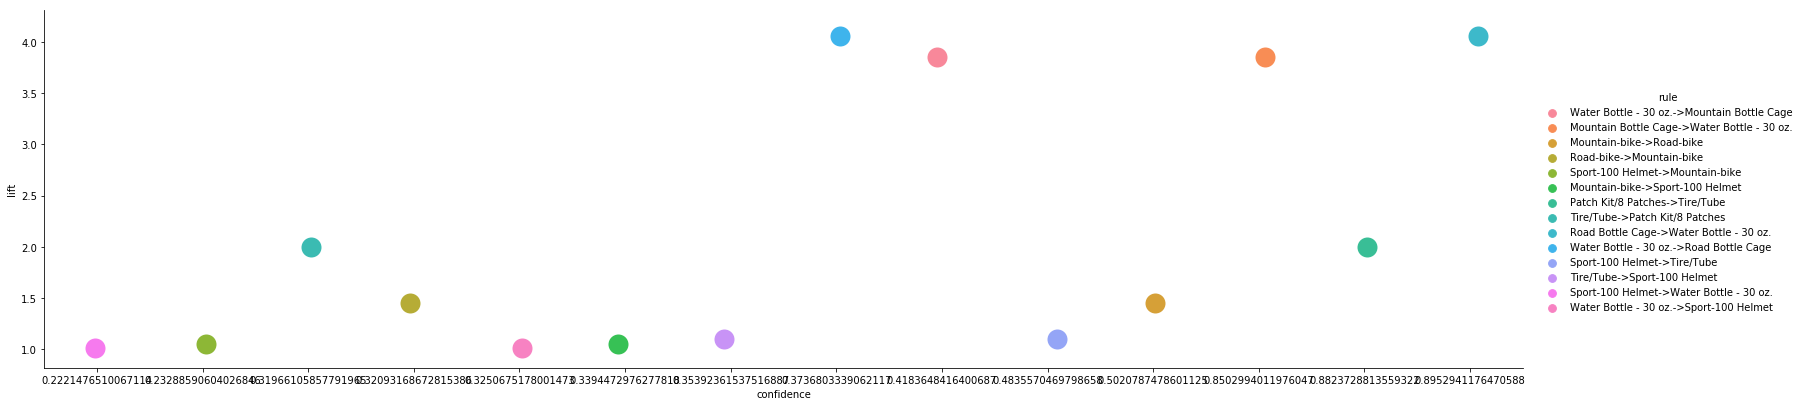

In [35]:
 my_rules3["rule"] = my_rules3["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rules3["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 
sns.catplot(data = my_rules3, x = "confidence", y = "lift", aspect = 3.75, hue = "rule", height=5.75, s = 20)
plt.show()

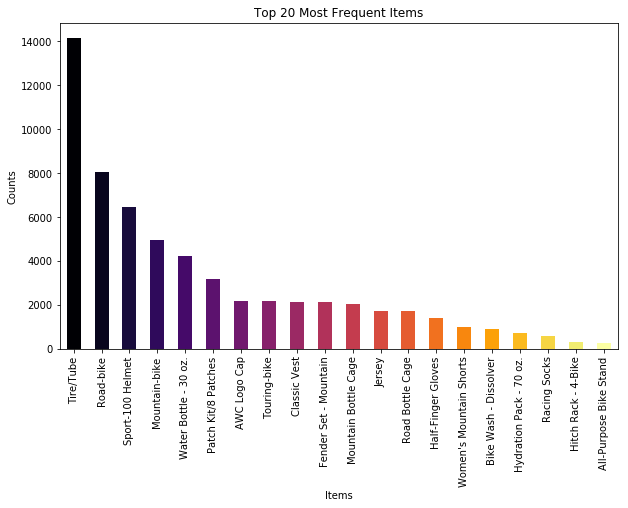

In [36]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
data['EnglishProductName'].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

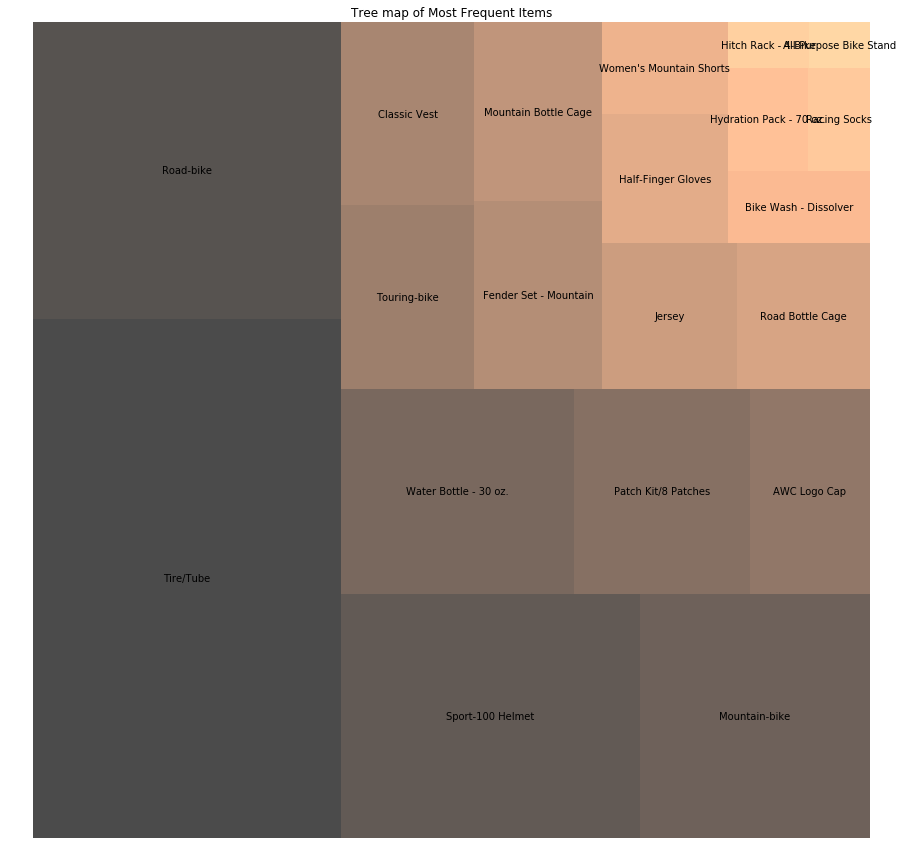

In [37]:
plt.rcParams['figure.figsize']=(15,15)
Items = data['EnglishProductName'].value_counts().head(20).to_frame()
size = Items['EnglishProductName'].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [38]:
AU = pd.read_csv('Autumn.csv', sep=';' )
AU.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,DueDate,EnglishProductName
0,528,16130,SO66172,1,23.09.2013,Tire/Tube
1,528,23564,SO66388,1,27.09.2013,Tire/Tube
2,528,17674,SO66601,1,30.09.2013,Tire/Tube
3,528,26677,SO66659,1,01.10.2013,Tire/Tube
4,528,11169,SO66984,1,06.10.2013,Tire/Tube


In [39]:
WI = pd.read_csv('Winter.csv', sep=';' )
WI.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,DueDate,EnglishProductName
0,528,14870,SO51900,1,09.02.2013,Tire/Tube
1,528,15319,SO51948,1,10.02.2013,Tire/Tube
2,528,16384,SO52043,1,12.02.2013,Tire/Tube
3,528,15476,SO52045,1,12.02.2013,Tire/Tube
4,528,15861,SO52094,1,13.02.2013,Tire/Tube


In [40]:
SP = pd.read_csv('Spring.csv', sep=';' )
SP.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,DueDate,EnglishProductName
0,528,16001,SO54064,1,20.03.2013,Tire/Tube
1,528,14463,SO54065,1,20.03.2013,Tire/Tube
2,528,11049,SO54129,1,21.03.2013,Tire/Tube
3,528,15485,SO54284,1,24.03.2013,Tire/Tube
4,528,14749,SO54495,1,28.03.2013,Tire/Tube


In [41]:
SU = pd.read_csv('Summer.csv', sep=';' )
SU.head()

,ProductKey,CustomerKey,SalesOrderNumber,OrderQuantity,DueDate,EnglishProductName
0,528,15955,SO59781,1,21.06.2013,Tire/Tube
1,528,14487,SO59783,1,21.06.2013,Tire/Tube
2,528,15392,SO59935,1,23.06.2013,Tire/Tube
3,528,12201,SO59949,1,23.06.2013,Tire/Tube
4,528,15295,SO60006,1,24.06.2013,Tire/Tube


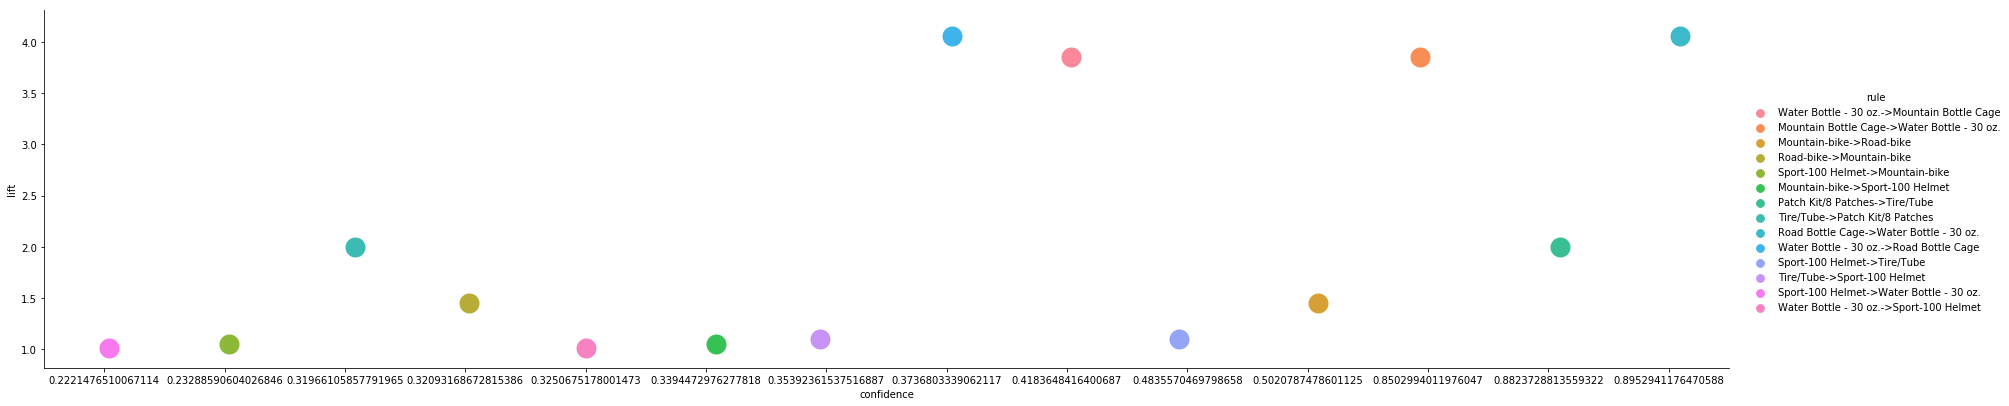

In [42]:
mybasketAU = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_setsAU = mybasketAU.applymap(my_encode_units)

my_frequent_itemsetsAU = apriori(my_basket_setsAU, min_support=0.07, use_colnames=True)

my_rulesAU = association_rules(my_frequent_itemsetsAU, metric="lift", min_threshold=1)

my_rulesAU["rule"] = my_rulesAU["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rulesAU["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 
sns.catplot(data = my_rulesAU, x = "confidence", y = "lift", aspect = 4.25, hue = "rule", height=5.75, s = 20)
plt.show()

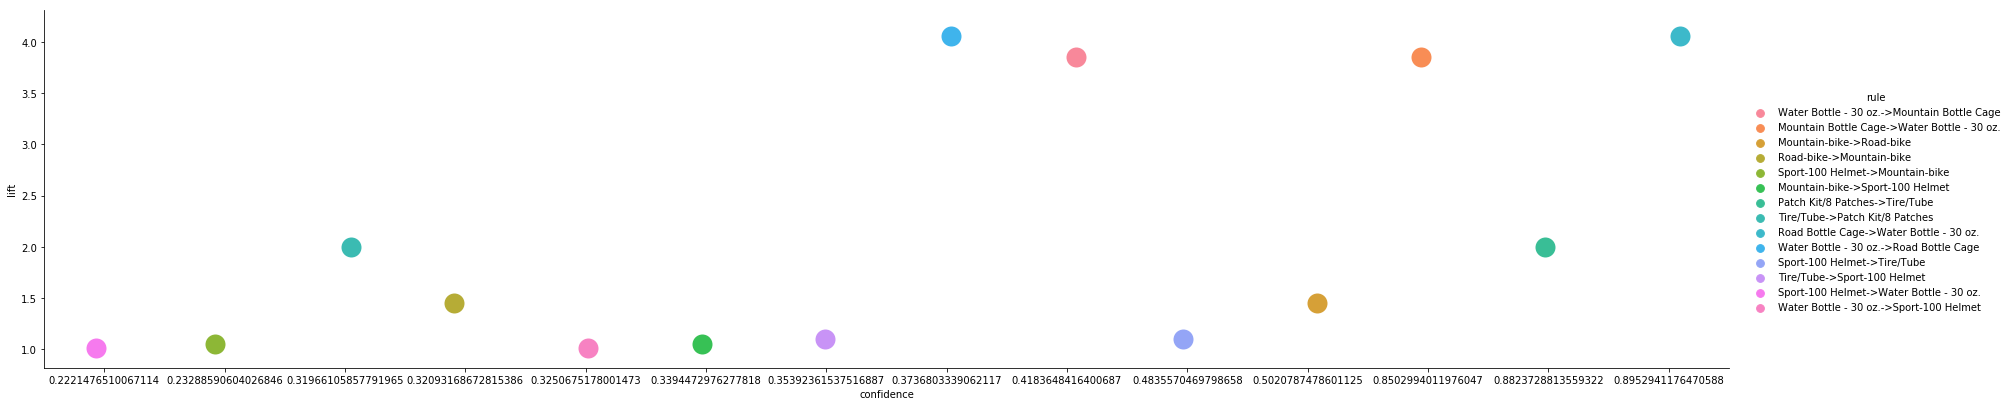

In [43]:
mybasketWI = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_setsWI = mybasketWI.applymap(my_encode_units)

my_frequent_itemsetsWI = apriori(my_basket_setsWI, min_support=0.07, use_colnames=True)

my_rulesWI = association_rules(my_frequent_itemsetsWI, metric="lift", min_threshold=1)

my_rulesWI["rule"] = my_rulesWI["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rulesWI["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 
sns.catplot(data = my_rulesWI, x = "confidence", y = "lift", aspect = 4.25, hue = "rule", height=5.75, s = 20)
plt.show()

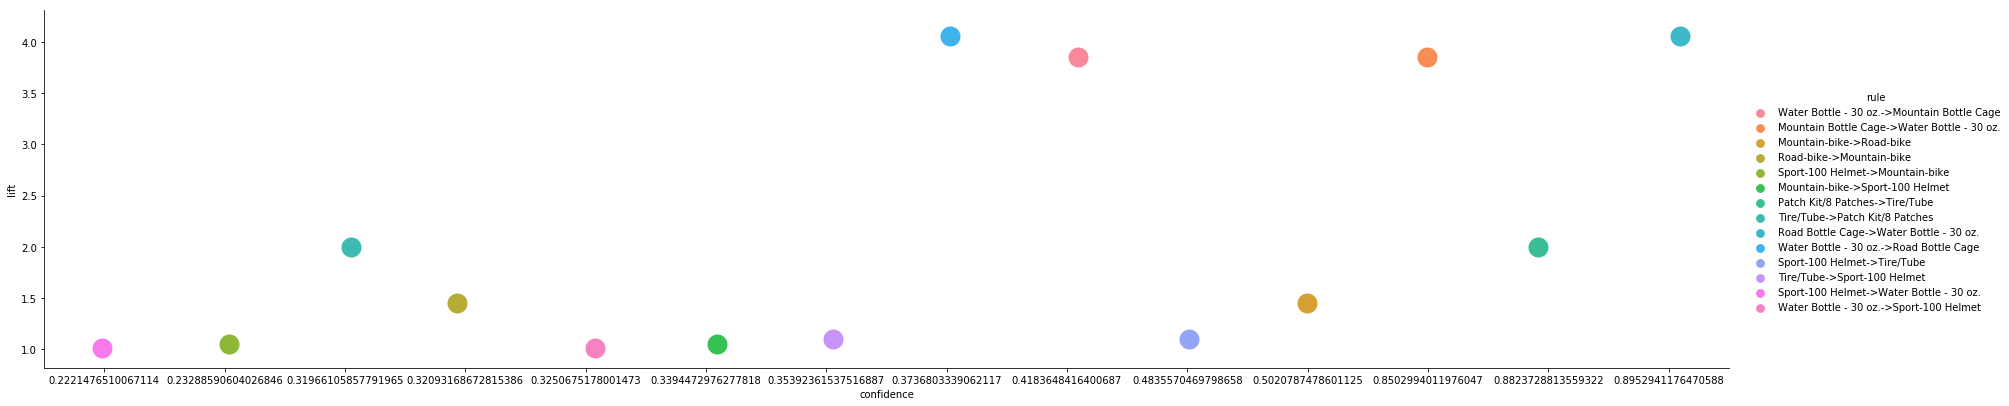

In [44]:
mybasketSP = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_setsSP = mybasketSP.applymap(my_encode_units)

my_frequent_itemsetsSP = apriori(my_basket_setsSP, min_support=0.07, use_colnames=True)

my_rulesSP = association_rules(my_frequent_itemsetsSP, metric="lift", min_threshold=1)

my_rulesSP["rule"] = my_rulesSP["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rulesSP["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 
sns.catplot(data = my_rulesSP, x = "confidence", y = "lift", aspect = 4.25, hue = "rule", height=5.75, s = 20)
plt.show()

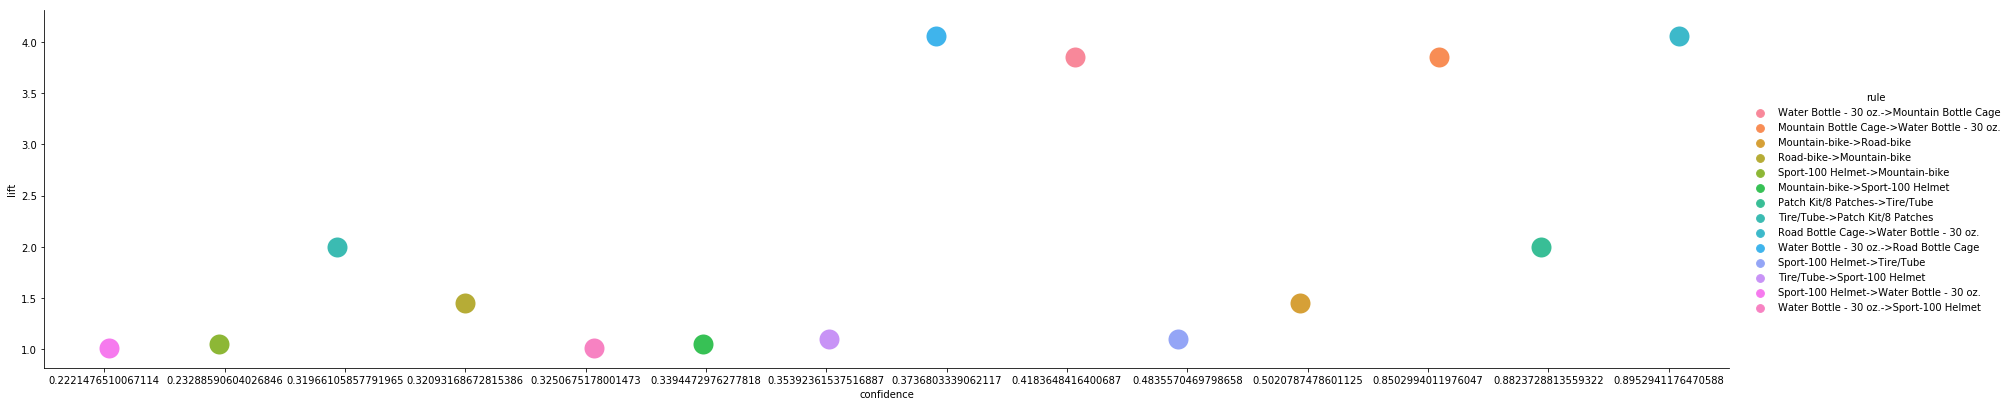

In [45]:
mybasketSU = data.groupby(['CustomerKey','EnglishProductName'])['OrderQuantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerKey')
my_basket_setsSU = mybasketSU.applymap(my_encode_units)

my_frequent_itemsetsSU = apriori(my_basket_setsSU, min_support=0.07, use_colnames=True)

my_rulesSU = association_rules(my_frequent_itemsetsSU, metric="lift", min_threshold=1)

my_rulesSU["rule"] = my_rulesSU["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + my_rulesSU["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 
sns.catplot(data = my_rulesSU, x = "confidence", y = "lift", aspect = 4.25, hue = "rule", height=5.75, s = 20)
plt.show()